In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from scipy import stats
import seaborn as sns

In [2]:
daily_data = pd.read_csv("daily_data.csv")
daily_data.set_index("date", inplace = True)

X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv")

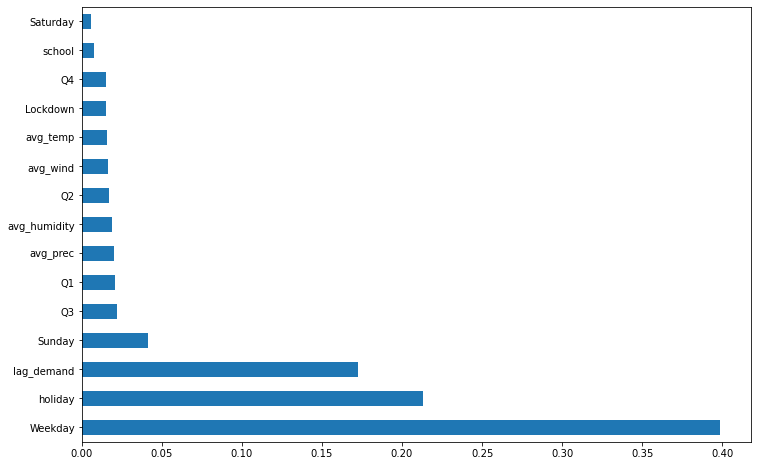

In [3]:
from xgboost import XGBRegressor
selection = XGBRegressor()
selection.fit(X_train, y_train)

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=daily_data.columns[1:])
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [4]:
import numpy as np
from sklearn.metrics import r2_score

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

def adj_r2(actual, pred, i):
    return 1 - ((1-r2_score(actual,pred))*(len(actual)-1)/(len(actual)-i-1))

In [5]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
    
param_dist = {
        'n_neighbors':range(3, 50, 1),
        'weights': ['uniform', 'distance'],
        'metric':['minkowski', 'euclidean', 'manhattan'],
          'leaf_size':range(1, 50, 5)
        }

knn =  KNeighborsRegressor()

knn_random = RandomizedSearchCV(estimator=knn,param_distributions=param_dist,
                               cv = 3,n_iter=300,n_jobs = -1,
                              verbose=1,random_state = 42)

In [6]:

for i in range(6,16):
    Xtrain_best = X_train[feat_importances.nlargest(i).index]
    knn_random.fit(Xtrain_best, y_train)
    Xtest_best = X_test[feat_importances.nlargest(i).index]
    
    y_pred= knn_random.predict(Xtest_best)

    y_pred_train = knn_random.predict(Xtrain_best)
    
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)



    from sklearn.metrics import r2_score
    print(i,"features: ")
    print(knn_random.best_params_)

    print("RMSE for test set is: ",(mse**(1/2)))
    print("RMSE for train set is: ", (mse_train**(1/2)))
    
    r2_adjtest = adj_r2(y_test, y_pred,i)
    r2_adjtrain = adj_r2(y_train, y_pred_train,i)
   
    print("Adjusted R2 score for test: ",r2_adjtest)
    print("Adjusted R2 score for training: ",r2_adjtrain)
    
    mape_test = mape(y_test, y_pred)
    mape_train = mape(y_train, y_pred_train)
    
   
    print("MAPE for test: ",mape_test)
    print("MAPE for training: ",mape_train)
    

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 864 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


6 features: 
{'weights': 'uniform', 'n_neighbors': 42, 'metric': 'manhattan', 'leaf_size': 46}
RMSE for test set is:  1671.6022085890834
RMSE for train set is:  1516.6807555214848
Adjusted R2 score for test:  0.47327549243890266
Adjusted R2 score for training:  0.53616467145477
MAPE for test:  4.33540205367225
MAPE for training:  4.0592168949301
Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


7 features: 
{'weights': 'uniform', 'n_neighbors': 42, 'metric': 'manhattan', 'leaf_size': 46}
RMSE for test set is:  1671.4379361691779
RMSE for train set is:  1516.6611793141226
Adjusted R2 score for test:  0.47203215560636325
Adjusted R2 score for training:  0.5358845648744217
MAPE for test:  4.333973238581292
MAPE for training:  4.058946611419936
Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 885 out of 900 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


8 features: 
{'weights': 'uniform', 'n_neighbors': 42, 'metric': 'manhattan', 'leaf_size': 46}
RMSE for test set is:  1671.4379361691779
RMSE for train set is:  1516.6611793141226
Adjusted R2 score for test:  0.4706783919027898
Adjusted R2 score for training:  0.5355921165851176
MAPE for test:  4.333973238581292
MAPE for training:  4.058946611419936
Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


9 features: 
{'weights': 'uniform', 'n_neighbors': 42, 'metric': 'manhattan', 'leaf_size': 46}
RMSE for test set is:  1671.3911441795926
RMSE for train set is:  1516.3415941675398
Adjusted R2 score for test:  0.4693473805160786
Adjusted R2 score for training:  0.5354951188472828
MAPE for test:  4.332797520439876
MAPE for training:  4.060227520194417
Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 885 out of 900 | elapsed:    3.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


10 features: 
{'weights': 'uniform', 'n_neighbors': 43, 'metric': 'minkowski', 'leaf_size': 46}
RMSE for test set is:  1674.3734168297233
RMSE for train set is:  1516.9035044390766
Adjusted R2 score for test:  0.46607945172922893
Adjusted R2 score for training:  0.534857511920958
MAPE for test:  4.339453785318768
MAPE for training:  4.0598960996508255
Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 885 out of 900 | elapsed:    3.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


11 features: 
{'weights': 'uniform', 'n_neighbors': 43, 'metric': 'minkowski', 'leaf_size': 46}
RMSE for test set is:  1674.3732279568744
RMSE for train set is:  1516.9091129442722
Adjusted R2 score for test:  0.4646999328355854
Adjusted R2 score for training:  0.5345604196043565
MAPE for test:  4.339393625473384
MAPE for training:  4.05989623791094
Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 885 out of 900 | elapsed:    4.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    4.3s finished


12 features: 
{'weights': 'uniform', 'n_neighbors': 43, 'metric': 'minkowski', 'leaf_size': 46}
RMSE for test set is:  1674.3732279568744
RMSE for train set is:  1516.9091129442722
Adjusted R2 score for test:  0.46331314509681754
Adjusted R2 score for training:  0.534266395864372
MAPE for test:  4.339393625473384
MAPE for training:  4.05989623791094
Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 885 out of 900 | elapsed:    3.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


13 features: 
{'weights': 'uniform', 'n_neighbors': 43, 'metric': 'minkowski', 'leaf_size': 46}
RMSE for test set is:  1674.3732279568744
RMSE for train set is:  1516.9145911499074
Adjusted R2 score for test:  0.46191915326590016
Adjusted R2 score for training:  0.5339686343552277
MAPE for test:  4.339393625473384
MAPE for training:  4.05990860486858
Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 885 out of 900 | elapsed:    4.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


14 features: 
{'weights': 'uniform', 'n_neighbors': 43, 'metric': 'minkowski', 'leaf_size': 46}
RMSE for test set is:  1674.3732279568744
RMSE for train set is:  1516.9145911499074
Adjusted R2 score for test:  0.46051790106086343
Adjusted R2 score for training:  0.5336738643579824
MAPE for test:  4.339393625473384
MAPE for training:  4.05990860486858
Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s


15 features: 
{'weights': 'uniform', 'n_neighbors': 44, 'metric': 'manhattan', 'leaf_size': 16}
RMSE for test set is:  1674.7314705574674
RMSE for train set is:  1517.438043470693
Adjusted R2 score for test:  0.4588778529838705
Adjusted R2 score for training:  0.5330566251373323
MAPE for test:  4.332888141845821
MAPE for training:  4.060815048275428


[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    4.1s finished


In [7]:
#We get the best results with 6 features

### Final KNN Regression model

In [8]:


regressor = KNeighborsRegressor(weights= 'uniform', n_neighbors= 42, metric='manhattan', leaf_size= 46)

Xtrain_best = X_train[feat_importances.nlargest(6).index]
regressor.fit(Xtrain_best, y_train)
Xtest_best = X_test[feat_importances.nlargest(6).index]
    
y_pred= regressor.predict(Xtest_best)


    
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

print("RMSE for test set is: ",(mse**(1/2)))
  
r2_adjtest = adj_r2(y_test, y_pred,6)

   
print("Adjusted R2 score for test: ",r2_adjtest)

mape_test = mape(y_test, y_pred)

print("MAPE for test: ",mape_test)

RMSE for test set is:  1671.6022085890834
Adjusted R2 score for test:  0.47327549243890266
MAPE for test:  4.33540205367225


<Figure size 1440x1440 with 0 Axes>

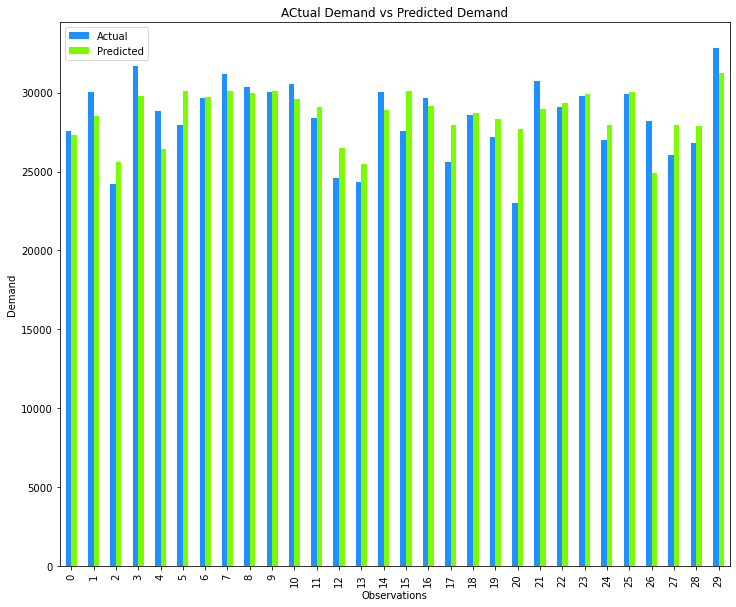

In [9]:
plt.figure(figsize= (20,20))
df = pd.concat([y_test, pd.DataFrame(y_pred)], axis = 1)
df.columns = {"Actual","Predicted"}

df.head(30).plot(kind='bar',figsize=(12,10),color = {"dodgerblue","lawngreen"})
plt.title("ACtual Demand vs Predicted Demand")
plt.xlabel("Observations")
plt.ylabel("Demand")
plt.show()